In [1]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
jokic_career = playercareerstats.PlayerCareerStats(player_id='203999')
jokic_career_df = jokic_career.get_data_frames()[0]

In [8]:
# Calculate average points per game, rebounds per game, and assists per game
jokic_career_df['PPG'] = jokic_career_df['PTS'] / jokic_career_df['GP']
jokic_career_df['RPG'] = jokic_career_df['REB'] / jokic_career_df['GP']
jokic_career_df['APG'] = jokic_career_df['AST'] / jokic_career_df['GP']

In [9]:
# Add a triple double column
jokic_career_df['TD'] = np.where((jokic_career_df['PPG'] >= 10) & (jokic_career_df['RPG'] >= 10) & (jokic_career_df['APG'] >= 10), 1, 0)

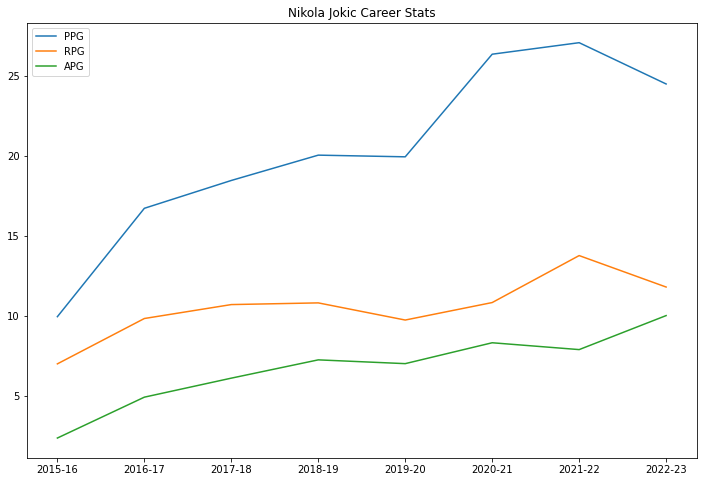

In [12]:
# Plot a line graph of PPG, RPG, APG
plt.figure(figsize=(12, 8))
plt.plot(jokic_career_df['SEASON_ID'], jokic_career_df['PPG'], label='PPG')
plt.plot(jokic_career_df['SEASON_ID'], jokic_career_df['RPG'], label='RPG')
plt.plot(jokic_career_df['SEASON_ID'], jokic_career_df['APG'], label='APG')
plt.title('Nikola Jokic Career Stats')
plt.legend()
plt.show()

0    0.512
1    0.578
2    0.499
3    0.511
4    0.528
5    0.566
6    0.583
7    0.634
Name: FG_PCT, dtype: float64

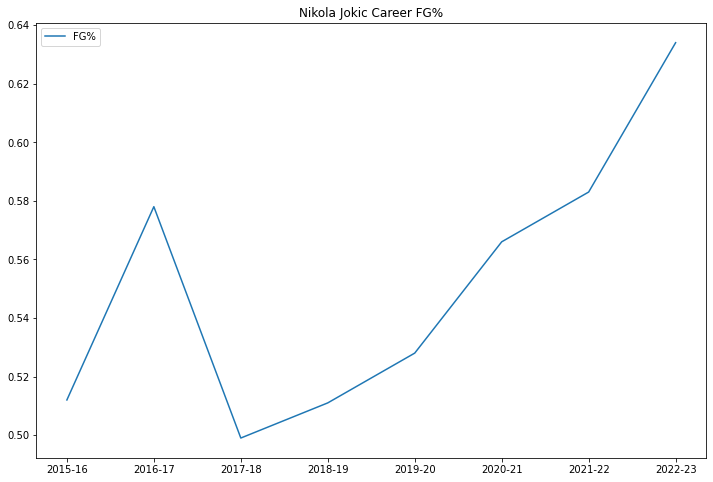

In [16]:
# Create a line graph of FG%
plt.figure(figsize=(12, 8))
plt.plot(jokic_career_df['SEASON_ID'], jokic_career_df['FG_PCT'], label='FG%')
plt.title('Nikola Jokic Career FG%')
plt.legend()
plt.show()

In [17]:
# Get Jokic game logs for the 2022-2023 season
from nba_api.stats.endpoints import playergamelog
jokic_gamelog = playergamelog.PlayerGameLog(player_id='203999', season='2022-23')
jokic_gamelog_df = jokic_gamelog.get_data_frames()[0]

# Get Jayson Tatum
tatum_gamelog = playergamelog.PlayerGameLog(player_id='1628369', season='2022-23')
tatum_gamelog_df = tatum_gamelog.get_data_frames()[0]

# Get Giannis Antetokounmpo
giannis_gamelog = playergamelog.PlayerGameLog(player_id='203507', season='2022-23')
giannis_gamelog_df = giannis_gamelog.get_data_frames()[0]

In [29]:
# For each player, calculate the average points per game, rebounds per game, and assists per game
jokic_gamelog_df['PAR'] = jokic_gamelog_df['PTS'] + jokic_gamelog_df['REB'] + jokic_gamelog_df['AST']
tatum_gamelog_df['PAR'] = tatum_gamelog_df['PTS'] + tatum_gamelog_df['REB'] + tatum_gamelog_df['AST']
giannis_gamelog_df['PAR'] = giannis_gamelog_df['PTS'] + giannis_gamelog_df['REB'] + giannis_gamelog_df['AST']

# Get mean PAR for each player
jokic_mean = jokic_gamelog_df['PAR'].mean()
tatum_mean = tatum_gamelog_df['PAR'].mean()
giannis_mean = giannis_gamelog_df['PAR'].mean()

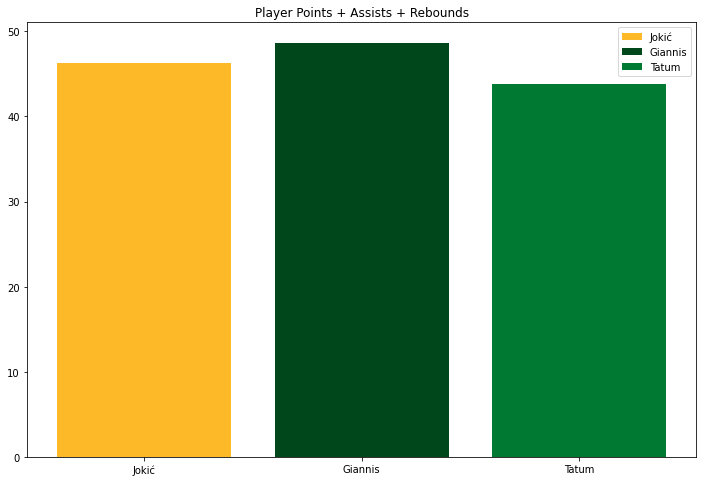

In [30]:
# Create a bar graph of PAR
plt.figure(figsize=(12, 8))
plt.bar('Jokić', jokic_mean, label='Jokić', color='#FDB927')
plt.bar('Giannis', giannis_mean, label='Giannis', color='#00471B')
plt.bar('Tatum', tatum_mean, label='Tatum', color='#007A33')
plt.title('Player Points + Assists + Rebounds')
plt.legend()
plt.show()

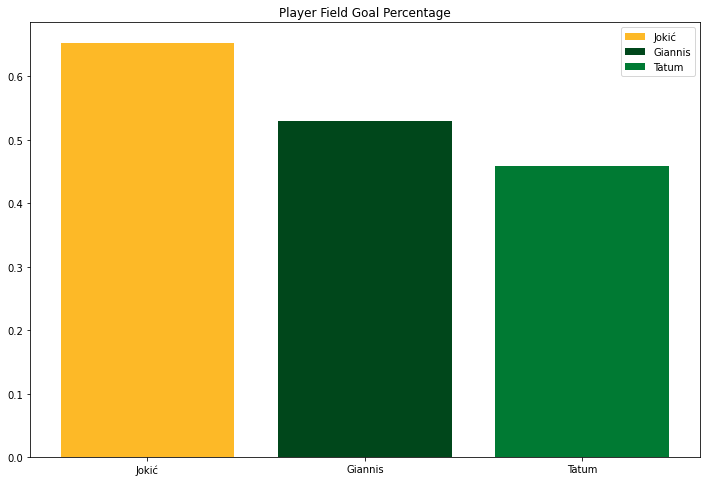

In [31]:
# Calculate average FG% for each player
jokic_gamelog_df['FG%'] = jokic_gamelog_df['FGM'] / jokic_gamelog_df['FGA']
tatum_gamelog_df['FG%'] = tatum_gamelog_df['FGM'] / tatum_gamelog_df['FGA']
giannis_gamelog_df['FG%'] = giannis_gamelog_df['FGM'] / giannis_gamelog_df['FGA']

# Get Mean FG% for each player
jokic_fg = jokic_gamelog_df['FG%'].mean()
tatum_fg = tatum_gamelog_df['FG%'].mean()
giannis_fg = giannis_gamelog_df['FG%'].mean()

# Create a bar graph of FG%
plt.figure(figsize=(12, 8))
plt.bar('Jokić', jokic_fg, label='Jokić', color='#FDB927')
plt.bar('Giannis', giannis_fg, label='Giannis', color='#00471B')
plt.bar('Tatum', tatum_fg, label='Tatum', color='#007A33')
plt.title('Player Field Goal Percentage')
plt.legend()
plt.show()